# Implementation Scikit Learn Without Feature Selection


In [7]:
from random import random
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve, auc, matthews_corrcoef
import matplotlib.pyplot as plt
import time

# import from sckit learn
from sklearn.ensemble import RandomForestClassifier


In [8]:
train_path = "../../../data/processed/train_data.csv"  # Replace with your train file path
test_path = "../../../data/processed/test_data.csv"    # Replace with your test file path

# Assuming the target column is named 'target'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Split features and target
X_train = train_data.drop(columns=["target"])  # Replace "target" with the actual name
y_train = train_data["target"]

X_test = test_data.drop(columns=["target"])
y_test = test_data["target"]

In [9]:
clf = RandomForestClassifier(n_estimators=10)
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 0.27 seconds


In [10]:
start_time = time.time()
predictions = clf.predict(X_test.to_numpy())
end_time = time.time()

testing_time = end_time - start_time
print(f"Testing time: {testing_time:.2f} seconds")

Testing time: 0.00 seconds


C:\Users\unknow\Desktop\IASD S1\Parkinson_disease_classification\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Calculate MCC

In [11]:
mcc = matthews_corrcoef(y_test, predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.81


In [12]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return float(accuracy)

# We get 89% Without Feature Selection

In [13]:
acc = accuracy(y_test, predictions)
acc

0.8971631205673759

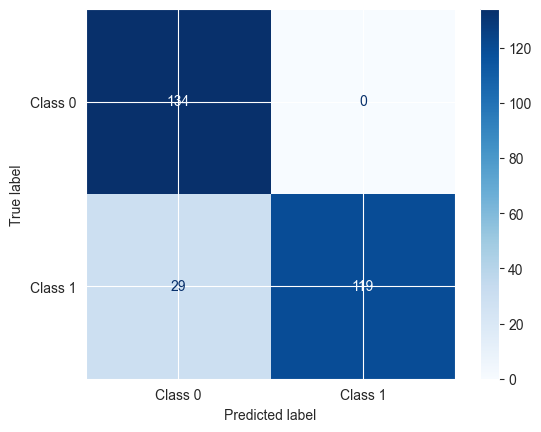

In [14]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")

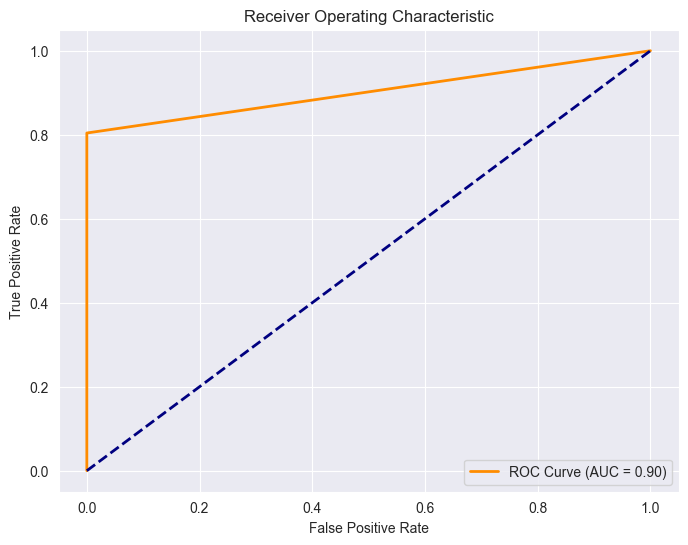

In [15]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [16]:
print("Classification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       134
           1       1.00      0.80      0.89       148

    accuracy                           0.90       282
   macro avg       0.91      0.90      0.90       282
weighted avg       0.92      0.90      0.90       282






# Implementation Scikit Learn With Feature Selection


In [17]:
train_path = "../../../data/processed/train_filtered.csv"
test_path = "../../../data/processed/test_filtered.csv"

# Assuming the target column is named 'target'
train_data_ = pd.read_csv(train_path)
test_data_ = pd.read_csv(test_path)

# Split features and target
X_train_ = train_data_.drop(columns=["target"])  # Replace "target" with the actual name
y_train_ = train_data_["target"]

X_test_ = test_data_.drop(columns=["target"])
y_test_ = test_data_["target"]



In [18]:
clf = RandomForestClassifier(n_estimators=10)
start_time = time.time()
clf.fit(X_train_, y_train_)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 0.06 seconds


In [19]:
start_time = time.time()
predictions = clf.predict(X_test_.to_numpy())
end_time = time.time()

testing_time = end_time - start_time
print(f"Testing time: {testing_time:.2f} seconds")

Testing time: 0.00 seconds


C:\Users\unknow\Desktop\IASD S1\Parkinson_disease_classification\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
mcc = matthews_corrcoef(y_test_, predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.80


# We Get 90% accuracy

In [21]:
acc = accuracy(y_test_, predictions)
acc

0.8936170212765957

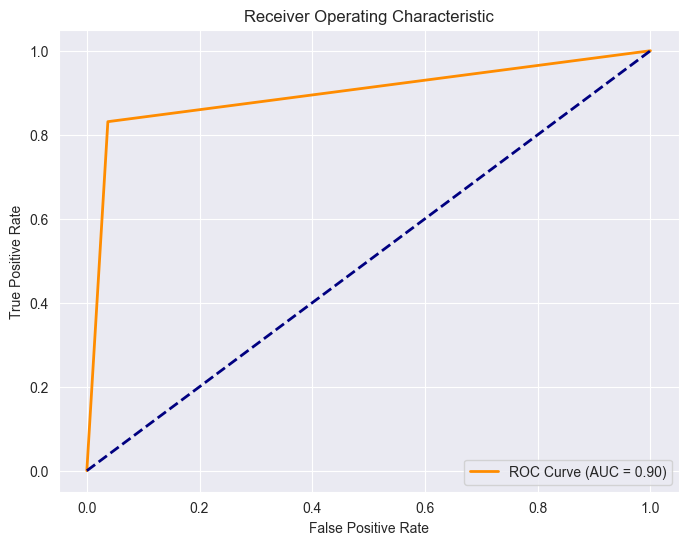

In [22]:
fpr, tpr, _ = roc_curve(y_test_, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [23]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test_, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       134
           1       0.96      0.83      0.89       148

    accuracy                           0.89       282
   macro avg       0.90      0.90      0.89       282
weighted avg       0.90      0.89      0.89       282

